**SVM - Introduction to hyperplane, margin and support vectors**

In [1]:
#import necessary libraries to work with SVM
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
#Create a synthetic dataset with 2 clusters of data
x,y = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=1)

In [3]:
#Train the model
svm_margin = SVC(kernel='linear')
svm_margin.fit(x,y)

SVC(kernel='linear')

In [4]:
def svm_boundary(x,y,model,ax,title):
  """
visualize the decision boundry and margins
  Args:
    x: input data with two features (2D array)
    y: class label
    model: trained svm model
    ax: axis object from subplots
    title: title of the plot
  """
  cmap = ListedColormap(['purple','yellow'])

  #Scatter plot of data points with different colors for classes
  ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap=cmap,edgecolors='k')
  ax.set_title(title)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")

  #gets x and y limits of plot area
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()


  #Creating grid points spanning the plot area
  xx,yy=np.meshgrid(np.linspace(xlim[0],xlim[1],50),
                    np.linspace(ylim[0],ylim[1],50))

  #Decision function evaluates the distance of points from the decision boundary
  z=model.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

  #set line styles for decision boundary and margins
  ax.contour(xx,yy,z,levels=[-1,0,1],linestyles=['--','-','--'],colors='k')

  #Highlight the support vectors
  ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,facecolors='none',edgecolors='k',linewidths=1.5)


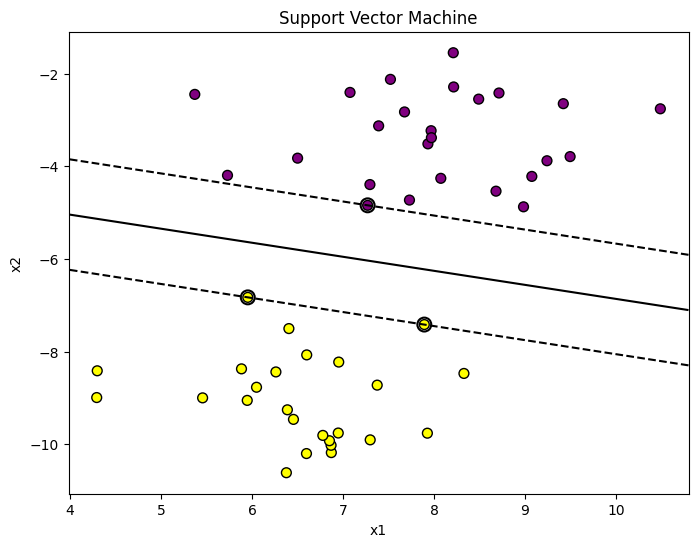

In [5]:
fig,ax = plt.subplots(figsize=(8,6))
svm_boundary(x=x,y=y,model=svm_margin,ax=ax,title='Support Vector Machine')
plt.show()

**SVM - Hard Margin**

In [6]:
#Create a synthetic dataset with 2 clusters of data
a,b = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=1.5)

In [7]:
#Hard margin SVM with linear kernal and train the model with x,y data
svm_hard_margin = SVC(kernel='linear',C=1e6)
svm_hard_margin.fit(a,b)

SVC(C=1000000.0, kernel='linear')

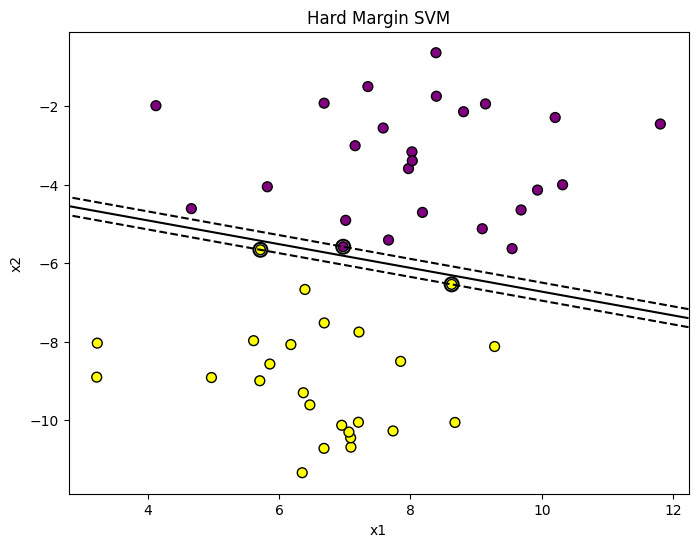

In [8]:
fig,ax = plt.subplots(figsize=(8,6))
svm_boundary(a,b,svm_hard_margin,ax,'Hard Margin SVM')
plt.show()

**SVM - Soft Margin**

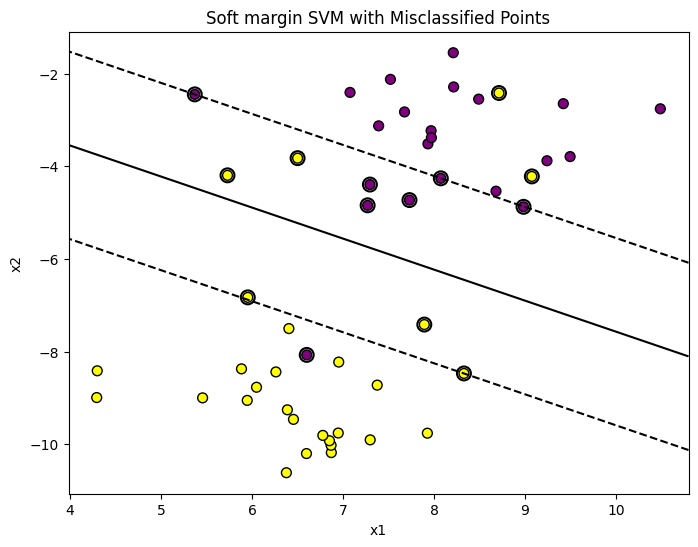

In [9]:
#set 5 misclassified points
misclassified_points=np.random.choice(range(len(y)),size=5,replace=False)
y[misclassified_points] = 1-y[misclassified_points]

#Train the model
svm_soft_margin =SVC(kernel='linear', C=10)
svm_soft_margin.fit(x,y)

#plot
fig, ax = plt.subplots(figsize=(8, 6))
svm_boundary(x, y, svm_soft_margin, ax, 'Soft margin SVM with Misclassified Points')

plt.show()

**Soft margin SVM - Different C values**

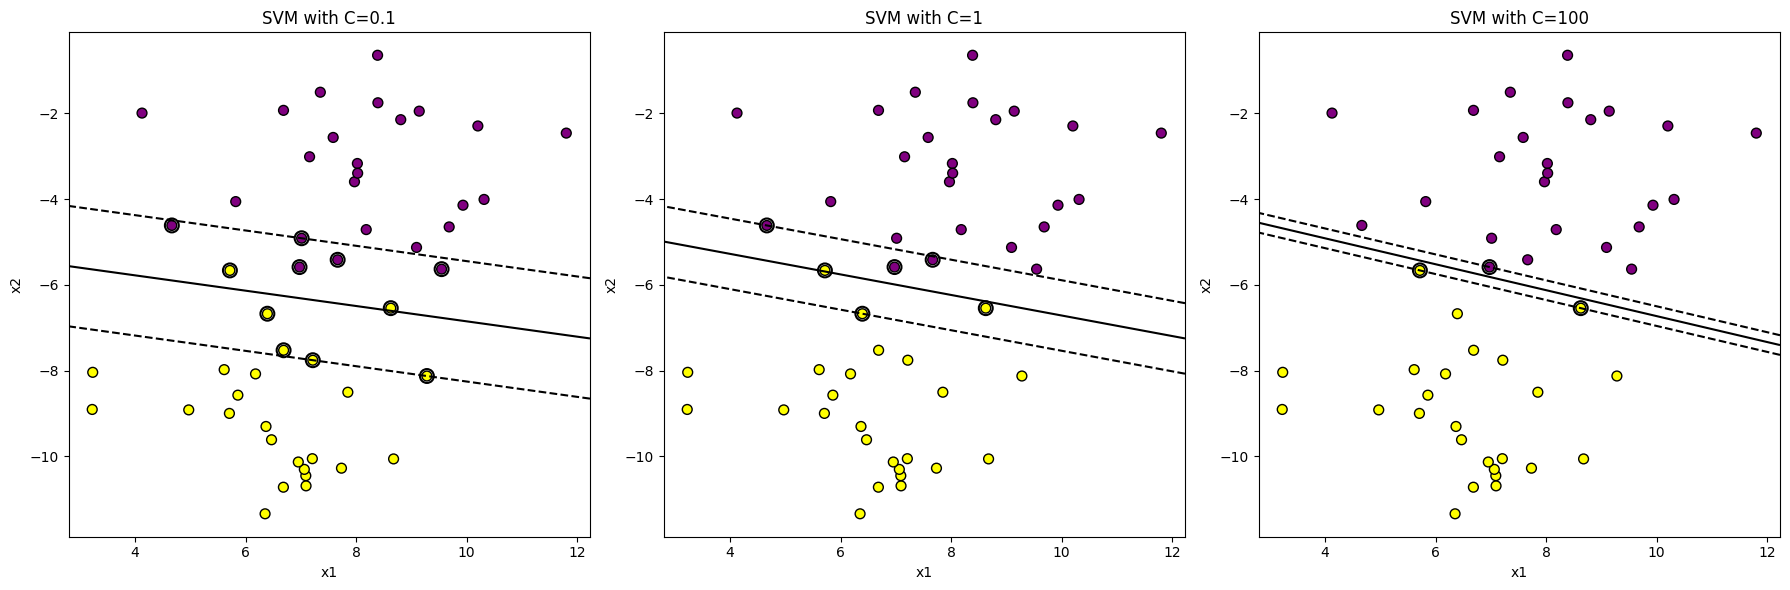

Misclassified points for C=0.1:2
Misclassified points for C=1:1
Misclassified points for C=100:0


In [10]:
fig,axes = plt.subplots(1,3,figsize=(18,6))

#list of C values to test margin changes
c_values = [0.1,1,100]

misclassified_points ={}

#Loop through each C value, train the model, and plot the decision boundry
for i,c in enumerate(c_values):
    svm = SVC(kernel='linear',C=c)
    svm.fit(a,b)
    svm_boundary(a,b, model=svm, ax=axes[i], title=f"SVM with C={c}")

    #Count the number of misclassified points
    misclassified =(svm.predict(a)!= b).sum()
    misclassified_points[c]=misclassified

plt.tight_layout()
plt.show()

#print the missclassified points
for C,misclassified in misclassified_points.items():
    print(f"Misclassified points for C={C}:{misclassified}")
